In [1]:
import numpy as np 
import sys,os
import cv2
import matplotlib.pyplot as plt
import argparse
import pandas as pd
from utils import *


In [2]:
root_dir = "/home/sebasmos/Documentos/NASA_Spacesuit/train/"
# Load data paths
training_images = []   # images png + jpg
img_ann = []        # images annotations
    
videos = []         # videos
videos_ann = []     # videos annotations
video_frames = []   # video frames
video_frames_ann=[] # video frames annotations

for root, dirs, files in os.walk(root_dir, topdown=True):
    for name in files:
        path = os.path.join(root, name)            
        if '.png' in path  and 'images' in path:
            training_images.append(path)
            print(path)
        if '.jpg' in path  and 'images' in path:
            training_images.append(path)
        if '.txt' in path and 'images' in path:
            img_ann.append(path)
        if '.mov' in path and 'videos' in path:
            videos.append(path)
        if '.csv' in path and 'videos' in path:
            videos_ann.append(path)
        if '.jpg' in path and 'videos-frames' in path:
            video_frames.append(path)
            #if '.csv' in path and 'videos-frames' in path: #TODO: CHECK ANNOTATIONS
            #    video_frames_ann.append(path)
print('Image training instances: ', len(training_images))
print('videos training instances: ', len(videos))
print('video_frames evaluation instances: ', len(video_frames))


/home/sebasmos/Documentos/NASA_Spacesuit/train/images/969689.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/409779.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/969698.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/526920.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/049349.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/950880.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/336825.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/591443.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/988860.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/198464.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/530935.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/759158.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/140435.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/394854.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/775588.png
/home/sebasmos/Documentos

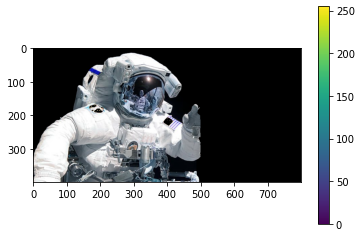

1

In [3]:
def segmentation(path, label):
    image = cv2.imread(path)
    mask = np.zeros(image.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    rectangle = (0, 0, 500, image.shape[1])
    cv2.grabCut(image, mask, rectangle,  
                backgroundModel, foregroundModel,
                3, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
   
    # The final mask is multiplied with 
    # the input image to give the segmented image.
    image = image * mask2[:, :, np.newaxis]
      
    # output segmented image with colorbar
   
    plt.imshow(image)
    plt.colorbar()
    plt.show()
    '''
    cv2.imwrite('/home/sebasmos/Documentos/NASA_Spacesuit/NASA_SpatiumAESS/Training_code/code/image.jpg',image)
    '''
    return 1
# Fast testing bef assignmt
path = "/home/sebasmos/Documentos/NASA_Spacesuit/train/images/933760.jpg"
segmentation(path, 1)

In [9]:
i = 0
# Training with images 
Num_features = 1
feat_names = ['Polygon'] # TODO: EXTRACT TRIPLETS HERE!
train_size = len(training_images)

data_train = np.zeros((train_size, Num_features+1), dtype=np.float32)
#data_test = np.zeros((test_size, Num_features+1), dtype=np.float32)
for path in training_images:
    print('    {}/{}...'.format(i+1, len(training_images)))
    data_train[i, :] = feature_extraction(path, 2)
    i = i+1


    1/86...
    2/86...
    3/86...
    4/86...
    5/86...
    6/86...
    7/86...
    8/86...
    9/86...
